In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [191]:
%matplotlib inline

from matplotlib import image as mpimage
from matplotlib import pyplot as plt

import yaml
import os

import pandas as pd
import numpy as np
import random

from sklearn.model_selection import train_test_split

import cv2
import keras

In [192]:
SEED = 1993

In [193]:
with open('conf/user_conf.yaml', 'r') as f:
    conf = yaml.load(f)

In [194]:
patches_path = os.path.join(conf['data_path'], 'slides', 'patches')
patches_files = [os.path.join(patches_path, x) for x in os.listdir(patches_path)]

In [195]:
slides_df = pd.read_csv(os.path.join(conf['data_path'], 'slides_metadata.csv'), sep='|')

## Train/Test split in Slides

The idea is to avoid using patches from the same slide both in train and test.

In [196]:
slides_df = slides_df[slides_df['sample_type'].isin(['Primary Tumor', 'Solid Tissue Normal'])]

In [197]:
slides_df['sample_type'].value_counts(normalize=True)

Primary Tumor          0.907527
Solid Tissue Normal    0.092473
Name: sample_type, dtype: float64

In [198]:
slides_train, slides_test = train_test_split(slides_df, test_size=0.2, 
                                             stratify=slides_df['sample_type'], random_state=SEED) 

In [199]:
slides_train['sample_type'].value_counts(normalize=True)

Primary Tumor          0.908602
Solid Tissue Normal    0.091398
Name: sample_type, dtype: float64

In [200]:
slides_train['sample_type'].value_counts(normalize=True)

Primary Tumor          0.908602
Solid Tissue Normal    0.091398
Name: sample_type, dtype: float64

## Read Images

In [201]:
patches_files_train = [x for x in patches_files 
                       if any([y in x for y in slides_train['slide_id'].values])]

In [202]:
patches_files_train = patches_files_train[:1000]

In [203]:
images_train = np.array([mpimage.imread(x) for x in patches_files_train])

In [204]:
images_train.shape

(1000, 128, 128, 3)

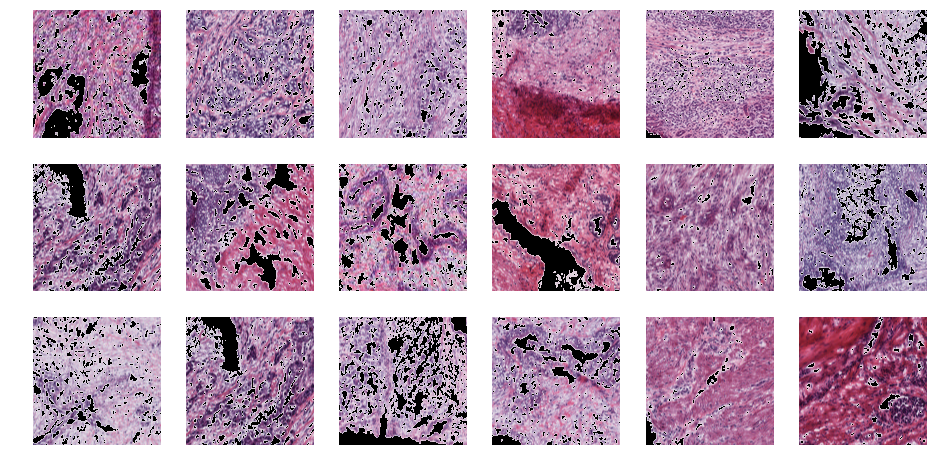

In [206]:
plot_multiple_patches(images_train)

## Tests

In [44]:
import urllib, gzip, pickle

mnistfile = 'mnist.pkl.gz'
if not os.path.isfile(mnistfile):
    url = urllib.request.URLopener()
    url.retrieve("http://deeplearning.net/data/mnist/mnist.pkl.gz", mnistfile)
f = gzip.open(mnistfile, 'rb')

training_set, validation_set, testing_set = pickle.load(f, encoding='latin1')

f.close()

In [64]:
training_set[0].shape

(50000, 784)

In [58]:
import numpy as np

def reshape_mnist(vectors):
    images = np.reshape(vectors, (-1,28,28,1))
    return images

In [59]:
training_set2 = reshape_mnist(training_set[0])

In [63]:
training_set2.shape

(50000, 28, 28, 1)

In [78]:
%matplotlib inline

from matplotlib import image as mpimage
from matplotlib import pyplot as plt
import numpy as np

import random

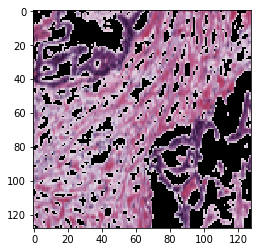

In [91]:
img = mpimage.imread(random.choice(patches_files_train))
plt.imshow(img)